# Carga de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [3]:
!kaggle competitions download -c udea-ai4eng-20241

 24% 5.00M/21.2M [00:00<00:00, 42.6MB/s]
100% 21.2M/21.2M [00:00<00:00, 114MB/s] 


In [4]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


# Reconocimiento inicial de los datos, busqueda de nulos y limpieza

In [5]:
train = pd.read_csv('train.csv')
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [6]:
len(train.index)

692500

In [7]:
train.isnull().any()

ID                                False
PERIODO                           False
ESTU_PRGM_ACADEMICO               False
ESTU_PRGM_DEPARTAMENTO            False
ESTU_VALORMATRICULAUNIVERSIDAD     True
ESTU_HORASSEMANATRABAJA            True
FAMI_ESTRATOVIVIENDA               True
FAMI_TIENEINTERNET                 True
FAMI_EDUCACIONPADRE                True
FAMI_TIENELAVADORA                 True
FAMI_TIENEAUTOMOVIL                True
ESTU_PRIVADO_LIBERTAD             False
ESTU_PAGOMATRICULAPROPIO           True
FAMI_TIENECOMPUTADOR               True
FAMI_TIENEINTERNET.1               True
FAMI_EDUCACIONMADRE                True
RENDIMIENTO_GLOBAL                False
dtype: bool

In [8]:
train.isnull().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

In [9]:
clean_df=train.copy()
clean_df=clean_df.dropna()
clean_df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [10]:
clean_df.isnull().sum()

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PRIVADO_LIBERTAD             0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_TIENEINTERNET.1              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
dtype: int64

In [11]:
len(clean_df.index)

628896

# Transformación y Encoding del Dataset

Al contar unicamente con variables categoricas se debe hacer primero un tratamiento de los datos para pasar a la fase de feature selection, aplicación y evaluación del modelo

## Variables de SI y NO (OHE)

Para las variables categoricas de tipo S/N utlizamos one hot encoding generando las columnas dummie

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
columns_ohe = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','ESTU_PRIVADO_LIBERTAD','ESTU_PAGOMATRICULAPROPIO','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET.1']

for column in columns_ohe:
  print (clean_df[column].unique())


['Si' 'No']
['Si' 'No']
['Si' 'No']
['N' 'S']
['No' 'Si']
['Si' 'No']
['Si' 'No']


In [14]:
ohe_encoded_data = pd.get_dummies(clean_df, columns=columns_ohe,dtype=int)
ohe_encoded_data

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,...,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET.1_No,FAMI_TIENEINTERNET.1_Si
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Postgrado,medio-alto,...,0,1,1,0,1,0,0,1,0,1
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,...,1,0,1,0,1,0,0,1,1,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,...,1,0,1,0,1,0,1,0,0,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,No sabe,Secundaria (Bachillerato) completa,alto,...,1,0,1,0,1,0,0,1,0,1
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Primaria completa,Primaria completa,medio-bajo,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,medio-alto,...,1,0,1,0,0,1,0,1,0,1
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Primaria incompleta,Secundaria (Bachillerato) incompleta,bajo,...,1,0,1,0,1,0,0,1,0,1
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,medio-bajo,...,1,0,1,0,0,1,0,1,0,1
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,Primaria completa,Primaria completa,bajo,...,1,0,1,0,0,1,0,1,1,0


## Variables categoricas ordinals (OE)

Iniciamos con las variables categoricas que cuentan con un orden lógico y el encoding se hace de acuerdo al mismo

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [16]:
est = ohe_encoded_data['FAMI_ESTRATOVIVIENDA'].unique()
print(est)
valor_matri = ohe_encoded_data['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()
print(valor_matri)
horas_t = ohe_encoded_data['ESTU_HORASSEMANATRABAJA'].unique()
print(horas_t)
edu_p = ohe_encoded_data['FAMI_EDUCACIONPADRE'].unique()
print(edu_p)
edu_m = ohe_encoded_data['FAMI_EDUCACIONMADRE'].unique()
print(edu_m)

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Estrato 6'
 'Sin Estrato']
['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula']
['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas']
['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' 'Secundaria (Bachillerato) incompleta'
 'Ninguno' 'No Aplica']
['Postgrado' 'Técnica o tecnológica incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional incompleta' 'Educación profesional completa

In [17]:
est_order=['Sin Estrato','Estrato 1','Estrato 2','Estrato 3', 'Estrato 4', 'Estrato 5','Estrato 6']
matri_order=['No pagó matrícula','Menos de 500 mil','Entre 500 mil y menos de 1 millón','Entre 1 millón y menos de 2.5 millones','Entre 2.5 millones y menos de 4 millones',
             'Entre 4 millones y menos de 5.5 millones','Entre 5.5 millones y menos de 7 millones','Más de 7 millones']
horas_order=['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas']
edu_order=['No Aplica','No sabe','Ninguno','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa',
           'Técnica o tecnológica incompleta','Técnica o tecnológica completa','Educación profesional incompleta','Educación profesional completa','Postgrado']

In [18]:
columnas_oe=['FAMI_ESTRATOVIVIENDA','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE']
orders_oe=[est_order,matri_order,horas_order,edu_order,edu_order]

In [19]:
column_names = ohe_encoded_data.columns.tolist()
oe1_encoded_data=ohe_encoded_data
for i in range(5):
  category=orders_oe[i]
  columna=columnas_oe[i]
  column_transformer = ColumnTransformer(
      transformers=[
          ('ordinal', OrdinalEncoder(categories=[category]),[columna])
      ],
      remainder='passthrough'  # Keep remaining columns unchanged
  )
  oe1_encoded_data = column_transformer.fit_transform(oe1_encoded_data)
  column_names.remove(columnas_oe[i])
  new=columnas_oe[i]+'_Encoded'
  column_names.insert(0,new)
  oe1_encoded_data = pd.DataFrame(oe1_encoded_data, columns=column_names)

oe1_encoded_data

,FAMI_EDUCACIONMADRE_Encoded,FAMI_EDUCACIONPADRE_Encoded,ESTU_HORASSEMANATRABAJA_Encoded,ESTU_VALORMATRICULAUNIVERSIDAD_Encoded,FAMI_ESTRATOVIVIENDA_Encoded,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,RENDIMIENTO_GLOBAL,...,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET.1_No,FAMI_TIENEINTERNET.1_Si
0,11.0,7.0,1.0,6.0,3.0,904256,20212,ENFERMERIA,BOGOTÁ,medio-alto,...,0,1,1,0,1,0,0,1,0,1
1,7.0,8.0,0.0,4.0,3.0,645256,20212,DERECHO,ATLANTICO,bajo,...,1,0,1,0,1,0,0,1,1,0
2,6.0,6.0,4.0,4.0,3.0,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,bajo,...,1,0,1,0,1,0,1,0,0,1
3,6.0,1.0,0.0,5.0,4.0,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,alto,...,1,0,1,0,1,0,0,1,0,1
4,4.0,4.0,3.0,4.0,3.0,989032,20212,PSICOLOGIA,ANTIOQUIA,medio-bajo,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628891,5.0,6.0,2.0,2.0,2.0,25096,20195,BIOLOGIA,LA GUAJIRA,medio-alto,...,1,0,1,0,0,1,0,1,0,1
628892,5.0,3.0,4.0,4.0,3.0,754213,20212,PSICOLOGIA,NORTE SANTANDER,bajo,...,1,0,1,0,1,0,0,1,0,1
628893,5.0,6.0,1.0,3.0,3.0,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,medio-bajo,...,1,0,1,0,0,1,0,1,0,1
628894,4.0,4.0,1.0,4.0,1.0,986620,20195,PSICOLOGIA,TOLIMA,bajo,...,1,0,1,0,0,1,0,1,1,0


## Variables Categoricas Nominales Complejas

Para variables categoricas nominales (que no cuentan con un orden pre-establecido) como es el caso del departamento y el programa academico se debe realizar un análisis estadistico primero, ya que el one hot encoding generaria más de 1000 columnas nuevas en el dataset modificado si se utilizara para estas 2 columnas.

Por esto se usa un label encoding y se evalua la posibilidad de agrupar estas caracteristicas

In [20]:
departamentos = clean_df['ESTU_PRGM_DEPARTAMENTO'].unique()
rendimientos = clean_df['RENDIMIENTO_GLOBAL'].unique()

analisis_dept=[]
for departamento in departamentos:
  depar=[]
  filtered_data = clean_df[clean_df['ESTU_PRGM_DEPARTAMENTO'] == departamento]
  alto_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'alto'].shape[0]
  ma_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'medio-alto'].shape[0]
  mb_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'medio-bajo'].shape[0]
  bajo_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'bajo'].shape[0]
  total=filtered_data.shape[0]
  depar.append(departamento)
  depar.append(alto_count/total)
  depar.append(ma_count/total)
  depar.append(mb_count/total)
  depar.append(bajo_count/total)
  depar.append(total)
  analisis_dept.append(depar)

In [21]:
column_names = ['DEPARTAMENTO', '%ALTO', '%MA','%MB','%BAJO','TOTAL']
df_depar = pd.DataFrame(analisis_dept, columns=column_names)
df_depar= df_depar.sort_values(by='%ALTO', ascending=False)
order_depar=df_depar['DEPARTAMENTO'].tolist()
df_depar

,DEPARTAMENTO,%ALTO,%MA,%MB,%BAJO,TOTAL
7,CUNDINAMARCA,0.411933,0.255843,0.194939,0.137285,12922
2,SANTANDER,0.329330,0.269018,0.227724,0.173928,26396
22,CALDAS,0.328497,0.283374,0.228515,0.159614,10682
3,ANTIOQUIA,0.314251,0.260986,0.226577,0.198186,75621
10,VALLE,0.291415,0.251735,0.234775,0.222075,39919
0,BOGOTÁ,0.279353,0.247561,0.245026,0.228060,257985
16,BOYACA,0.270981,0.319931,0.247873,0.161215,12809
12,RISARALDA,0.255483,0.285652,0.248895,0.209970,11535
1,ATLANTICO,0.251054,0.233753,0.250270,0.264922,36992
11,QUINDIO,0.235231,0.270704,0.259644,0.234421,7414


In [22]:
programas = clean_df['ESTU_PRGM_ACADEMICO'].unique()
rendimientos = clean_df['RENDIMIENTO_GLOBAL'].unique()

analisis_progra=[]
for programa in programas:
  progra=[]
  filtered_data = clean_df[clean_df['ESTU_PRGM_ACADEMICO'] == programa]
  alto_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'alto'].shape[0]
  ma_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'medio-alto'].shape[0]
  mb_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'medio-bajo'].shape[0]
  bajo_count = filtered_data[filtered_data['RENDIMIENTO_GLOBAL'] == 'bajo'].shape[0]
  total=filtered_data.shape[0]
  progra.append(programa)
  progra.append(alto_count/total)
  progra.append(ma_count/total)
  progra.append(mb_count/total)
  progra.append(bajo_count/total)
  progra.append(total)
  analisis_progra.append(progra)

In [23]:
column_names = ['PROGRAMA', '%ALTO', '%MA','%MB','%BAJO','TOTAL']
df_progra = pd.DataFrame(analisis_progra, columns=column_names)
df_progra= df_progra.sort_values(by='%ALTO', ascending=False)
df_progra

,PROGRAMA,%ALTO,%MA,%MB,%BAJO,TOTAL
937,PROFESIONAL EN INVESTIGACIÓN CRIMINAL,1.0,0.000000,0.000000,0.000000,1
908,LICENCIATURA EN CIENCIAS SOCIALES,1.0,0.000000,0.000000,0.000000,2
820,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,1.0,0.000000,0.000000,0.000000,1
657,LICENCIATURA EN LITERATURA Y LENGUA CASTELLANA,1.0,0.000000,0.000000,0.000000,5
877,CIENCIAS DE LA COMPUTACION,1.0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...
896,ADMINISTRACION EN NEGOCIOS INTERNACIONALES,0.0,0.000000,0.000000,1.000000,1
722,PUBLICIDAD Y MARKETING DIGITAL,0.0,0.750000,0.250000,0.000000,4
113,ADMINISTRACION DE LA CALIDAD,0.0,0.000000,0.000000,1.000000,3
900,PROFESIONAL EN DISEÑO DE MODAS,0.0,0.333333,0.333333,0.333333,6


In [24]:
progra_1=[]
progra_2=[]
progra_3=[]
progra_4=[]
progra_5=[]
for index, row in df_progra.iterrows():
    if row['%ALTO'] >= 0.8:
        progra_1.append(row['PROGRAMA'])
    elif (row['%ALTO'] >= 0.6)&(row['%ALTO'] < 0.8):
        progra_2.append(row['PROGRAMA'])
    elif (row['%ALTO'] >= 0.4)&(row['%ALTO'] < 0.6):
        progra_3.append(row['PROGRAMA'])
    elif (row['%ALTO'] >= 0.2)&(row['%ALTO'] < 0.4):
        progra_4.append(row['PROGRAMA'])
    else:
      progra_5.append(row['PROGRAMA'])

Para el departamento se usa un ordinal encoder con las 31 categorias en el orden obtenido, es decir que a mejor resultado del departamento menor el indice.

Para el programa se hace un análisis y divisíon en 5 grupos según el porcentaje de estudiantes con un rendimiento 'alto', para luego hacer un label encoder manual mediante el nombre del programa

In [25]:
column_names = oe1_encoded_data.columns.tolist()
column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[order_depar]),['ESTU_PRGM_DEPARTAMENTO'])
    ],
    remainder='passthrough'  # Keep remaining columns unchanged
)
oe2_encoded_data = column_transformer.fit_transform(oe1_encoded_data)
column_names.remove('ESTU_PRGM_DEPARTAMENTO')
column_names.insert(0,'ESTU_PRGM_DEPARTAMENTO_Encoded')
oe2_encoded_data = pd.DataFrame(oe2_encoded_data, columns=column_names)

oe2_encoded_data

,ESTU_PRGM_DEPARTAMENTO_Encoded,FAMI_EDUCACIONMADRE_Encoded,FAMI_EDUCACIONPADRE_Encoded,ESTU_HORASSEMANATRABAJA_Encoded,ESTU_VALORMATRICULAUNIVERSIDAD_Encoded,FAMI_ESTRATOVIVIENDA_Encoded,ID,PERIODO,ESTU_PRGM_ACADEMICO,RENDIMIENTO_GLOBAL,...,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET.1_No,FAMI_TIENEINTERNET.1_Si
0,5.0,11.0,7.0,1.0,6.0,3.0,904256,20212,ENFERMERIA,medio-alto,...,0,1,1,0,1,0,0,1,0,1
1,8.0,7.0,8.0,0.0,4.0,3.0,645256,20212,DERECHO,bajo,...,1,0,1,0,1,0,0,1,1,0
2,5.0,6.0,6.0,4.0,4.0,3.0,308367,20203,MERCADEO Y PUBLICIDAD,bajo,...,1,0,1,0,1,0,1,0,0,1
3,1.0,6.0,1.0,0.0,5.0,4.0,470353,20195,ADMINISTRACION DE EMPRESAS,alto,...,1,0,1,0,1,0,0,1,0,1
4,3.0,4.0,4.0,3.0,4.0,3.0,989032,20212,PSICOLOGIA,medio-bajo,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628891,25.0,5.0,6.0,2.0,2.0,2.0,25096,20195,BIOLOGIA,medio-alto,...,1,0,1,0,0,1,0,1,0,1
628892,17.0,5.0,3.0,4.0,4.0,3.0,754213,20212,PSICOLOGIA,bajo,...,1,0,1,0,1,0,0,1,0,1
628893,5.0,5.0,6.0,1.0,3.0,3.0,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,medio-bajo,...,1,0,1,0,0,1,0,1,0,1
628894,11.0,4.0,4.0,1.0,4.0,1.0,986620,20195,PSICOLOGIA,bajo,...,1,0,1,0,0,1,0,1,1,0


In [26]:
definitive_df = oe2_encoded_data
for index, row in definitive_df.iterrows():
    if row['ESTU_PRGM_ACADEMICO'] in progra_1:
        definitive_df.at[index, 'ESTU_PRGM_ACADEMICO'] = '0'
    elif row['ESTU_PRGM_ACADEMICO'] in progra_2:
        definitive_df.at[index, 'ESTU_PRGM_ACADEMICO'] = '1'
    elif row['ESTU_PRGM_ACADEMICO'] in progra_3:
        definitive_df.at[index, 'ESTU_PRGM_ACADEMICO'] = '2'
    elif row['ESTU_PRGM_ACADEMICO'] in progra_4:
        definitive_df.at[index, 'ESTU_PRGM_ACADEMICO'] = '3'
    else:
      definitive_df.at[index, 'ESTU_PRGM_ACADEMICO'] = '4'

definitive_df

,ESTU_PRGM_DEPARTAMENTO_Encoded,FAMI_EDUCACIONMADRE_Encoded,FAMI_EDUCACIONPADRE_Encoded,ESTU_HORASSEMANATRABAJA_Encoded,ESTU_VALORMATRICULAUNIVERSIDAD_Encoded,FAMI_ESTRATOVIVIENDA_Encoded,ID,PERIODO,ESTU_PRGM_ACADEMICO,RENDIMIENTO_GLOBAL,...,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET.1_No,FAMI_TIENEINTERNET.1_Si
0,5.0,11.0,7.0,1.0,6.0,3.0,904256,20212,4,medio-alto,...,0,1,1,0,1,0,0,1,0,1
1,8.0,7.0,8.0,0.0,4.0,3.0,645256,20212,3,bajo,...,1,0,1,0,1,0,0,1,1,0
2,5.0,6.0,6.0,4.0,4.0,3.0,308367,20203,4,bajo,...,1,0,1,0,1,0,1,0,0,1
3,1.0,6.0,1.0,0.0,5.0,4.0,470353,20195,4,alto,...,1,0,1,0,1,0,0,1,0,1
4,3.0,4.0,4.0,3.0,4.0,3.0,989032,20212,3,medio-bajo,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628891,25.0,5.0,6.0,2.0,2.0,2.0,25096,20195,2,medio-alto,...,1,0,1,0,0,1,0,1,0,1
628892,17.0,5.0,3.0,4.0,4.0,3.0,754213,20212,3,bajo,...,1,0,1,0,1,0,0,1,0,1
628893,5.0,5.0,6.0,1.0,3.0,3.0,504185,20183,4,medio-bajo,...,1,0,1,0,0,1,0,1,0,1
628894,11.0,4.0,4.0,1.0,4.0,1.0,986620,20195,3,bajo,...,1,0,1,0,0,1,0,1,1,0


## Variable Target

Ahora hacemos el ordinal encoding de la variable target 'RENDIMIENTO_GLOBAL'

In [27]:
rendi_order= ['bajo','medio-bajo','medio-alto','alto']
column_names = definitive_df.columns.tolist()
column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[rendi_order]),['RENDIMIENTO_GLOBAL'])
    ],
    remainder='passthrough'  # Keep remaining columns unchanged
)
definitive_df = column_transformer.fit_transform(definitive_df)
column_names.remove('RENDIMIENTO_GLOBAL')
column_names.insert(0,'RENDIMIENTO_GLOBAL_Encoded')
definitive_df = pd.DataFrame(definitive_df, columns=column_names)

definitive_df

,RENDIMIENTO_GLOBAL_Encoded,ESTU_PRGM_DEPARTAMENTO_Encoded,FAMI_EDUCACIONMADRE_Encoded,FAMI_EDUCACIONPADRE_Encoded,ESTU_HORASSEMANATRABAJA_Encoded,ESTU_VALORMATRICULAUNIVERSIDAD_Encoded,FAMI_ESTRATOVIVIENDA_Encoded,ID,PERIODO,ESTU_PRGM_ACADEMICO,...,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET.1_No,FAMI_TIENEINTERNET.1_Si
0,2.0,5.0,11.0,7.0,1.0,6.0,3.0,904256,20212,4,...,0,1,1,0,1,0,0,1,0,1
1,0.0,8.0,7.0,8.0,0.0,4.0,3.0,645256,20212,3,...,1,0,1,0,1,0,0,1,1,0
2,0.0,5.0,6.0,6.0,4.0,4.0,3.0,308367,20203,4,...,1,0,1,0,1,0,1,0,0,1
3,3.0,1.0,6.0,1.0,0.0,5.0,4.0,470353,20195,4,...,1,0,1,0,1,0,0,1,0,1
4,1.0,3.0,4.0,4.0,3.0,4.0,3.0,989032,20212,3,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628891,2.0,25.0,5.0,6.0,2.0,2.0,2.0,25096,20195,2,...,1,0,1,0,0,1,0,1,0,1
628892,0.0,17.0,5.0,3.0,4.0,4.0,3.0,754213,20212,3,...,1,0,1,0,1,0,0,1,0,1
628893,1.0,5.0,5.0,6.0,1.0,3.0,3.0,504185,20183,4,...,1,0,1,0,0,1,0,1,0,1
628894,0.0,11.0,4.0,4.0,1.0,4.0,1.0,986620,20195,3,...,1,0,1,0,0,1,0,1,1,0


In [28]:
definitive_df=definitive_df.astype('int64')
definitive_df.dtypes

RENDIMIENTO_GLOBAL_Encoded                int64
ESTU_PRGM_DEPARTAMENTO_Encoded            int64
FAMI_EDUCACIONMADRE_Encoded               int64
FAMI_EDUCACIONPADRE_Encoded               int64
ESTU_HORASSEMANATRABAJA_Encoded           int64
ESTU_VALORMATRICULAUNIVERSIDAD_Encoded    int64
FAMI_ESTRATOVIVIENDA_Encoded              int64
ID                                        int64
PERIODO                                   int64
ESTU_PRGM_ACADEMICO                       int64
FAMI_TIENEINTERNET_No                     int64
FAMI_TIENEINTERNET_Si                     int64
FAMI_TIENELAVADORA_No                     int64
FAMI_TIENELAVADORA_Si                     int64
FAMI_TIENEAUTOMOVIL_No                    int64
FAMI_TIENEAUTOMOVIL_Si                    int64
ESTU_PRIVADO_LIBERTAD_N                   int64
ESTU_PRIVADO_LIBERTAD_S                   int64
ESTU_PAGOMATRICULAPROPIO_No               int64
ESTU_PAGOMATRICULAPROPIO_Si               int64
FAMI_TIENECOMPUTADOR_No                 

#Correlacion y Feature Selection

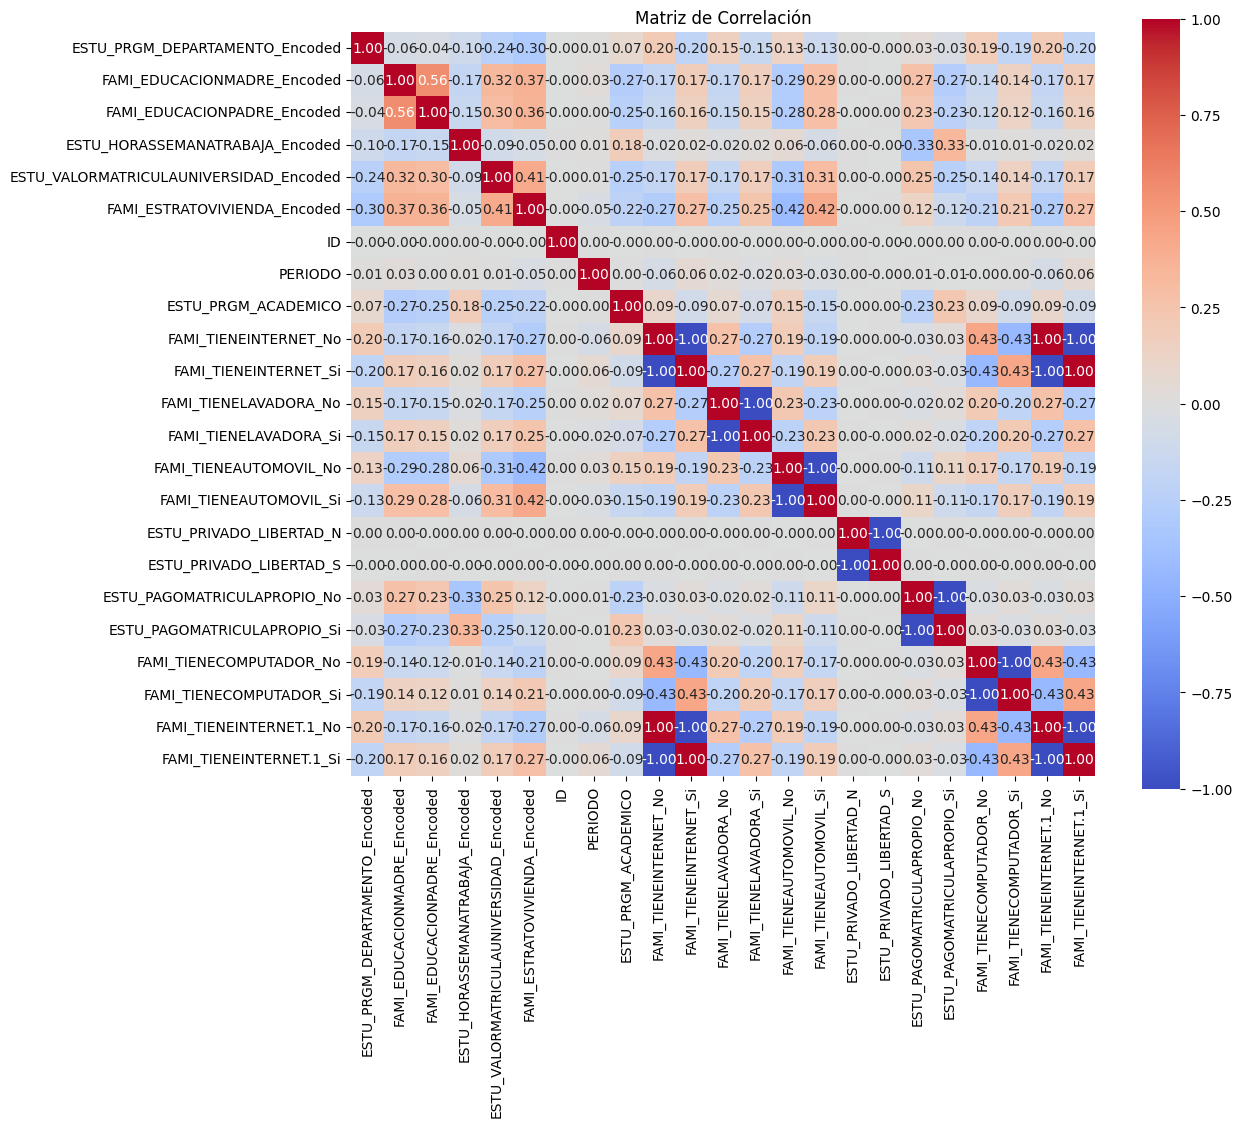

In [29]:
columns_to_correlate = definitive_df.columns[1:]
correlation_matrix = definitive_df[columns_to_correlate].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()

A partir de la matriz es posible afirmar que 'FAMI_TIENEINTERNET.1' y 'FAMI_TIENEINTERNET' son la misma columna, pues la relación es perfecta, por ende es posible eliminar ambas columnas de 'FAMI_TIENEINTERNET.1'

Para las columnas de one hot encoding la relación entre las columnas de Si y No con otras columnas tiene exactamente el mismo valor pero con signo contrario, por ende es posible reducir la dimensión del data set eliminando una de las columnas

también se eliminan las variables ID y PERIODO pues son de identificación y no aportan valor predictivo al modelo

In [30]:
opti_df = definitive_df
columns_to_drop = [ 'FAMI_TIENEINTERNET.1_No','FAMI_TIENEINTERNET.1_Si','FAMI_TIENEINTERNET_Si','FAMI_TIENELAVADORA_Si','FAMI_TIENEAUTOMOVIL_Si','ESTU_PRIVADO_LIBERTAD_S',
                   'ESTU_PAGOMATRICULAPROPIO_Si','FAMI_TIENECOMPUTADOR_Si','ID','PERIODO']

opti_df = opti_df.drop(columns=columns_to_drop)
opti_df

,RENDIMIENTO_GLOBAL_Encoded,ESTU_PRGM_DEPARTAMENTO_Encoded,FAMI_EDUCACIONMADRE_Encoded,FAMI_EDUCACIONPADRE_Encoded,ESTU_HORASSEMANATRABAJA_Encoded,ESTU_VALORMATRICULAUNIVERSIDAD_Encoded,FAMI_ESTRATOVIVIENDA_Encoded,ESTU_PRGM_ACADEMICO,FAMI_TIENEINTERNET_No,FAMI_TIENELAVADORA_No,FAMI_TIENEAUTOMOVIL_No,ESTU_PRIVADO_LIBERTAD_N,ESTU_PAGOMATRICULAPROPIO_No,FAMI_TIENECOMPUTADOR_No
0,2,5,11,7,1,6,3,4,0,0,0,1,1,0
1,0,8,7,8,0,4,3,3,1,0,1,1,1,0
2,0,5,6,6,4,4,3,4,0,0,1,1,1,1
3,3,1,6,1,0,5,4,4,0,0,1,1,1,0
4,1,3,4,4,3,4,3,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628891,2,25,5,6,2,2,2,2,0,0,1,1,0,0
628892,0,17,5,3,4,4,3,3,0,0,1,1,1,0
628893,1,5,5,6,1,3,3,4,0,0,1,1,0,0
628894,0,11,4,4,1,4,1,3,1,1,1,1,0,0


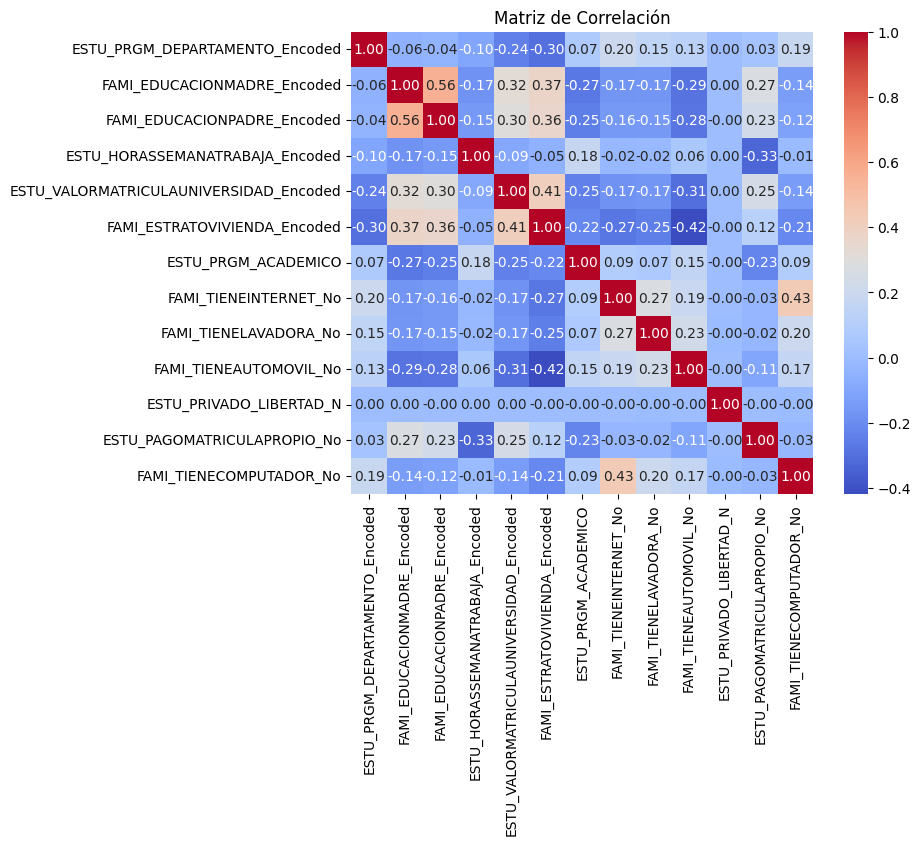

In [31]:
columns_to_correlate = opti_df.columns[1:]
correlation_matrix = definitive_df[columns_to_correlate].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()